In [1]:
import numpy as np                     # Llibreria matematica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mes facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
import sklearn.preprocessing as Pre
import warnings
warnings.filterwarnings('ignore')       #Per fer que els warnings no apareguin
%matplotlib inline              

In [2]:
import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

# Loading the dataset.
df = pd.read_csv('train.csv', sep=',', na_values="NA")

In [3]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,MiscVal,SaleType,SaleCondition,SalePrice,MasVnr,SecondFloor,Baths,Porch,Pool,Id
0,G,RH,0.185945,1.0,Lvl,Inside,Edwards,Artery,1Fam,2Story,...,0.0,WD,Normal,Level2,0.0,1.0,0.4,True,0.0,0
1,A,RL,0.198890,1.0,Lvl,Inside,NAmes,Norm,1Fam,1Story,...,0.0,WD,Family,Level2,1.0,0.0,0.0,True,0.0,1
2,L,RL,0.260616,1.0,Lvl,Corner,NridgHt,Norm,Twnhs,1Story,...,0.0,New,Partial,Level4,1.0,0.0,0.4,True,0.0,2
3,A,RL,0.251230,1.0,Lvl,Inside,NAmes,Norm,1Fam,1Story,...,0.0,WD,Abnorml,Level1,1.0,0.0,0.0,False,0.0,3
4,E,RL,0.174186,1.0,Lvl,Inside,SWISU,Norm,1Fam,1.5Fin,...,0.0,WD,Normal,Level2,0.0,1.0,0.4,True,0.0,4


In [4]:
X = df.drop(columns='SalePrice')
X = X.drop(columns = 'Id')
Y = df.loc[:,'SalePrice']

le = Pre.LabelEncoder()
le.fit(Y)
Y = le.fit_transform(Y)
i = 0
for t in X.dtypes:
    if t == object or t == bool:
        le.fit(X.iloc[:,i])
        X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
    i += 1

X_train, X_test, y_train, y_test = cv.train_test_split(X, Y, test_size=.3, random_state=1)

In [5]:
df.describe()

,LotArea,LotShape,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BedroomAbvGr,...,TotRmsAbvGrd,Fireplaces,GarageArea,Fence,MiscVal,MasVnr,SecondFloor,Baths,Pool,Id
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,...,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,0.293021,0.637177,0.570245,0.728888,0.469516,0.329981,0.792247,0.937376,0.283904,0.358847,...,0.375911,0.200795,0.338268,0.189861,0.003379,0.429423,0.434394,0.287475,0.003976,502.500000
std,0.136720,0.481054,0.148758,0.215303,0.191900,0.127514,0.237010,0.242406,0.119330,0.102457,...,0.134484,0.211069,0.148924,0.392386,0.038159,0.495240,0.495924,0.179280,0.062962,290.551487
min,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217776,0.000000,0.444444,0.601449,0.333333,0.248051,0.500000,1.000000,0.193264,0.250000,...,0.250000,0.000000,0.241727,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,251.250000
50%,0.287275,1.000000,0.555556,0.746377,0.333333,0.309420,1.000000,1.000000,0.273298,0.375000,...,0.333333,0.333333,0.344964,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,502.500000
75%,0.358753,1.000000,0.666667,0.934783,0.666667,0.407205,1.000000,1.000000,0.348141,0.375000,...,0.416667,0.333333,0.414388,0.000000,0.000000,1.000000,1.000000,0.400000,0.000000,753.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.762675,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1005.000000


## Linear SVM

In [10]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#knc = LinearSVC() 
knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))

Confusion matrix on test set:
 [[ 13  10   0   0   0]
 [  3 183  14   0   0]
 [  0  11  49   2   0]
 [  0   0   5   6   1]
 [  0   0   1   2   2]]

f1 on test set:  0.6732306818468107


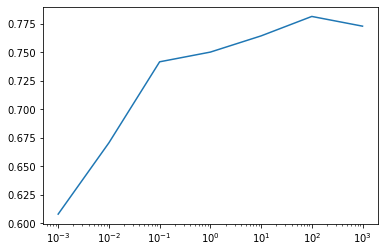

Acc. 10-fold cross on train data=  0.5754518148556477

Confusion matrix on test set:
 [[ 18   5   0   0   0]
 [  7 183  10   0   0]
 [  1   8  46   7   0]
 [  0   0   4   7   1]
 [  0   0   1   2   2]]

f1 on test set:  0.6813807562936482

Best value of parameter C found:  {'C': 100.0}

Number of supports:  288 ( 110 of them have slacks)
Prop. of supports:  0.4090909090909091


In [11]:
# List of C values to test. We usualy test diverse orders of magnitude
#Cs = np.logspace(-3, 11, num=15, base=10.0)
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_search.fit(X_train,y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('f1 10-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

#knc = LinearSVC(C=parval['C']) 
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

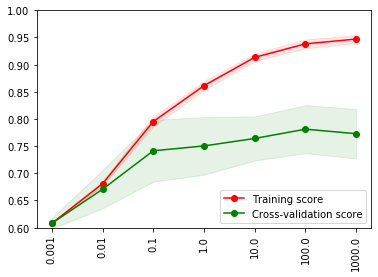

In [12]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc=4)


training_scores, test_scores = validation_curve(SVC(kernel='linear'), X_train, y_train, param_name="C", param_range=Cs,cv=10)
plot_validation_curve(range(len(Cs)), training_scores, test_scores)
plt.xticks(range(len(Cs)), Cs,rotation='vertical');
plt.ylim([0.6, 1])
plt.show()

## Polynomial kernels

In [13]:
knc = SVC(kernel='poly',degree =2) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))

Confusion matrix on test set:
 [[ 12  11   0   0   0]
 [  8 178  14   0   0]
 [  1  20  40   1   0]
 [  0   0   4   7   1]
 [  0   0   1   3   1]]

f1 on test set:  0.5942874312115786


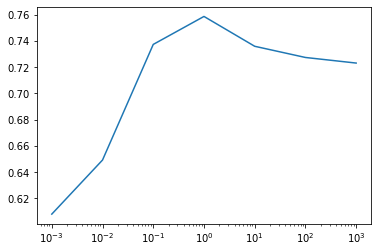

f1 10-fold cross on train data=  0.5417348705169939

Confusion matrix on test set:
 [[ 12  11   0   0   0]
 [  8 178  14   0   0]
 [  1  20  40   1   0]
 [  0   0   4   7   1]
 [  0   0   1   3   1]]

nf1 on test set:  0.5942874312115786

Best combination of parameters found:  {'C': 1.0}

Number of supports:  418 ( 242 of them have slacks)
Prop. of supports:  0.59375


In [14]:
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =2) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =2,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('f1 10-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly',degree =2,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nnf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

In [15]:
knc = SVC(kernel='poly',degree =3) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))

Confusion matrix on test set:
 [[ 14   9   0   0   0]
 [ 14 169  16   1   0]
 [  1  16  41   4   0]
 [  0   2   4   5   1]
 [  0   0   1   3   1]]

f1 on test set:  0.5478003000583646


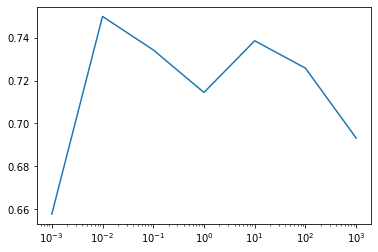

f1 10-fold cross on train data=  0.47115926723539225

Confusion matrix on test set:
 [[  7  16   0   0   0]
 [  2 183  15   0   0]
 [  0  24  36   2   0]
 [  0   1   4   7   0]
 [  0   0   1   4   0]]

Best combination of parameters found:  {'C': 0.01}

f1 on test set:  0.49417540773904706

Number of supports:  469 ( 429 of them have slacks)
Prop. of supports:  0.6661931818181818


In [16]:
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =3) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('f1 10-fold cross on train data= ', cvacc.mean())

knc = SVC(kernel='poly',degree =3,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

In [17]:
knc = SVC(kernel='poly',degree =4) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))

Confusion matrix on test set:
 [[ 14   9   0   0   0]
 [ 11 173  15   1   0]
 [  0  17  42   3   0]
 [  0   2   4   5   1]
 [  0   0   1   3   1]]

f1 on test set:  0.5651953066642149


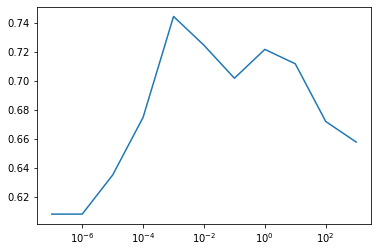

f1 10-fold cross on train data=  0.23636489559906906

Confusion matrix on test set:
 [[  8  15   0   0   0]
 [  3 185  12   0   0]
 [  0  26  35   1   0]
 [  0   0   4   8   0]
 [  0   0   1   4   0]]

Best combination of parameters found:  {'C': 0.001}

f1 on test set:  0.5186335847904766

Number of supports:  450 ( 362 of them have slacks)
Prop. of supports:  0.6392045454545454


In [18]:
Cs = np.logspace(-7, 3, num=11, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =4) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('f1 10-fold cross on train data= ', cvacc.mean())

knc = SVC(kernel='poly',degree =4,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

## RBF kernel

In [19]:
knc = SVC() 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))

Confusion matrix on test set:
 [[  3  20   0   0   0]
 [  1 183  16   0   0]
 [  0  22  39   1   0]
 [  0   1   7   4   0]
 [  0   0   2   3   0]]

f1 on test set:  0.42008495416946123


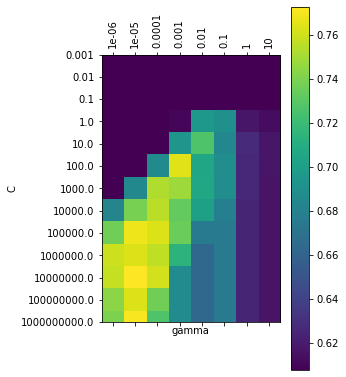


Best combination of parameters found:  {'C': 10000000.0, 'gamma': 1e-05}

f1 10-fold cross on train data=  0.5532253344809958

Confusion matrix on test set:
 [[ 16   7   0   0   0]
 [ 16 174  10   0   0]
 [  0  10  47   5   0]
 [  0   1   3   7   1]
 [  0   0   1   2   2]]

f1 on test set:  0.6544524929193918

Number of supports:  272 ( 38 of them have slacks)
Prop. of supports:  0.38636363636363635


In [20]:
# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-3, 9, num=13, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10)
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('\nf1 10-fold cross on train data= ', cvacc.mean())

knc = SVC(C=parval['C'], gamma=parval['gamma'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

# Conclusions
We can see that for our dataset, polynomial kernels do not work very well, as the accuracy is lower than with the other SVM and they have a lot of supports, which the majority of them, have slacks.
The linear SVM has obtained the best f1 score of them all but it has a large number of supports and 38% of them have slacks, on the other hand, when we use a RBF kernel, the accuracy is just 3% lower, but the number of supports is significatively lower and only a 14% have slacks.
So we conclude that using the RBF kernel is better.